# Project Name EDA and Statistical Analysis of FIFA Case Study

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.stats import randint
from scipy.stats import skewnorm
from math import factorial
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# PART-A ( Concept Based)--25 points

### The following are the BMI of 50 young adults

In [2]:
df=pd.DataFrame({'BMI' : [17.5, 18.0, 36.8, 31.7, 31.7,
                          17.3, 24.3, 47.7, 38.5, 17.0,
                          23.7, 16.5, 25.1, 17.4, 18.0,
                          37.6, 19.7, 21.4, 28.6, 21.6,
                          19.3, 20.0, 16.9, 25.2, 19.8,
                          25.0, 17.2, 20.4, 20.1, 29.1,
                          19.1, 25.2, 23.2, 25.9, 24.0,
                          41.7, 24.0, 16.8, 26.8, 31.4,
                          16.9, 17.2, 24.1, 35.2, 19.1,
                          22.9, 18.2, 25.4, 35.4, 25.5]})
df.head()

,BMI
0,17.5
1,18.0
2,36.8
3,31.7
4,31.7


## Q1. Compute the mean, median and the mode of the data

In [3]:
# mean
mean=df['BMI'].mean()
print('The mean is ',mean)

# median
median=df['BMI'].median()
print('The median is ',median)

#mode
mode=df['BMI'].mode()
print('The mode is\n ',mode)

The mean is  24.422000000000008
The median is  23.45
The mode is
  0    16.9
1    17.2
2    18.0
3    19.1
4    24.0
5    25.2
6    31.7
Name: BMI, dtype: float64


## Q2. Compute the range , variance and standard deviation of BMI

In [4]:
# range
ran=df['BMI'].max()-df['BMI'].min()
print('The range is ',ran)

# variance
variance=df['BMI'].var()
print('The variance is ',variance)

# standard deviation
std=df['BMI'].std()
print('The standard deviation is ',std)

The range is  31.200000000000003
The variance is  54.56093469387753
The standard deviation is  7.3865373954159015


## Q3. Find the mean deviation for the data .

In [5]:
x_bar=df['BMI'].mean()
n=len(df)
mean_deviation=sum(np.abs(df['BMI']-x_bar)/n)
print('the mean_deviation for the data is ',round(mean_deviation,3))

the mean_deviation for the data is  5.642


## Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data

In [7]:
s=df['BMI'].std()
md=df['BMI'].median()
skewness=(3*(x_bar-md))/s
print('The skewness of the data is ',skewness)

The skewness of the data is  0.3947722517196894


## Q5. Count the number of data values that fall within one standard deviation of the mean. Compare this with the answer from Chebyshev’s Theorem.

In [8]:
left_standard_deviation=x_bar-(1*s)
right_standard_deviation=x_bar+(1*s)
values_fall=df[(df['BMI']>left_standard_deviation)&(df['BMI']<right_standard_deviation)]
count=len(values_fall)
print(count,'observations fall between 1 standard deviations')

38 observations fall between 1 standard deviations


In [9]:
percentage=(count/len(df))*100
print(percentage,'% falls in 1 standard deviation')

76.0 % falls in 1 standard deviation


## Q6. Find the three quartiles and the interquartile range (IQR).


In [10]:
Q1=df['BMI'].quantile(0.25)
Q2=df['BMI'].quantile(0.50)
Q3=df['BMI'].quantile(0.75)
IQR=Q3-Q1
print('The First Quantile  is ',Q1)
print('The Second Quantile is ',Q2)
print('The Third Quantile  is ',Q3)
print('The Inter Quantile Range is ',IQR)

The First Quantile  is  18.425
The Second Quantile is  23.45
The Third Quantile  is  26.575
The Inter Quantile Range is  8.149999999999999


## Q7. Are there any outliers in the data set ?

In [11]:
UL=Q3+(1.5*IQR)
LL=Q1-(11.5*IQR)
df[(df['BMI']<LL)|(df['BMI']>UL)]

,BMI
7,47.7
35,41.7


## Q8. Draw a boxplot of the dataset to confirm .


<AxesSubplot:xlabel='BMI'>

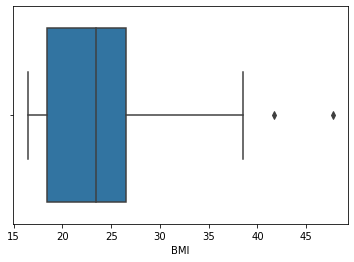

In [12]:
sns.boxplot(data=df,x='BMI')

## Q9. Find the percentile rank of the datapoint 25.0.

In [13]:
df['rank']=(df['BMI'].rank(pct=True))*100
df[df['BMI']==25.0]

,BMI,rank
25,25.0,62.0


In [6]:
# or
stats.percentileofscore(df,25)

62.0

## Q10. What is the probability that a young adult has a BMI above 25.0?


In [14]:
favourable_outcome=len(df[df['BMI']>25.0])
probability=favourable_outcome/len(df)
print("The probability that a young adult has a BMI above 25.0 is ",probability)

The probability that a young adult has a BMI above 25.0 is  0.38



## Q11. Create a frequency distribution for the data and visualize it appropriately

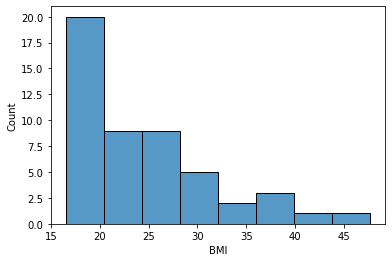

In [15]:
sns.histplot(data=df,x='BMI')
plt.show()

## Q12. Create a probability distribution of the data and visualize it appropriately. 

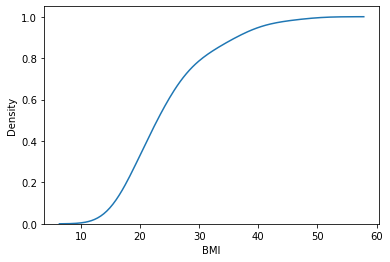

In [16]:
sns.kdeplot(data=df,x='BMI',cumulative=True)
plt.show()

## Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution ofthe mean age of customers. Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate the Central Limit Theorem?

In [17]:
df.shape

(50, 2)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

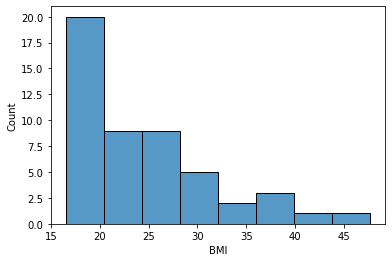

In [18]:
sns.histplot(data=df,x='BMI')

In [19]:
def sampling_distribution(x,no_of_sample,sample_size):
    sample_mean_list=[]
    for i in range(no_of_sample):    
        sample=np.random.choice(x,size=sample_size,replace=True)
        sample_mean=np.mean(sample)
        sample_mean_list.append(sample_mean)
    return sample_mean_list

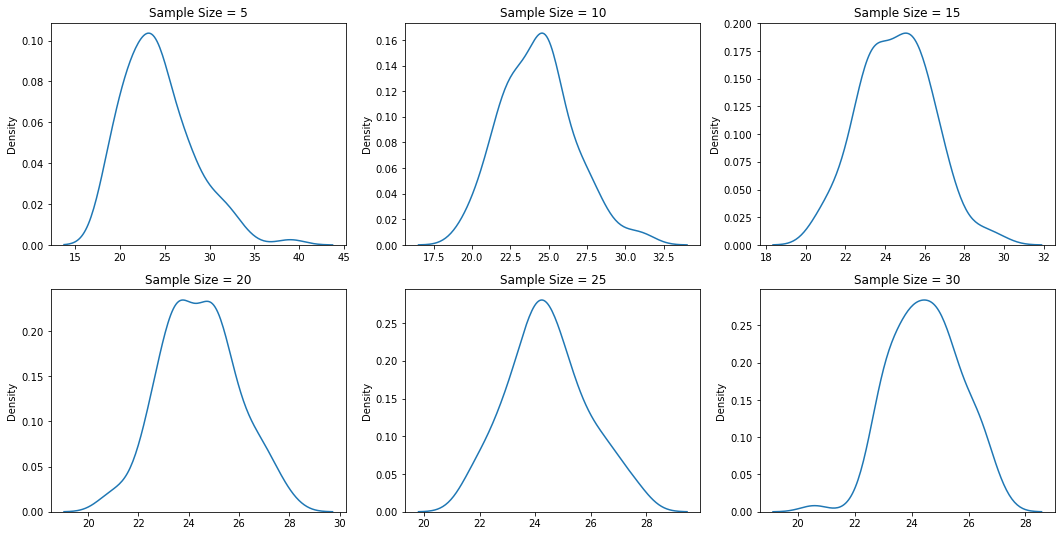

In [20]:
plt.figure(figsize=(18,9))
plt.subplot(2,3,1)
sns.kdeplot(x=sampling_distribution(df['BMI'],100,5))
plt.title("Sample Size = 5")
plt.subplot(2,3,2)
sns.kdeplot(x=sampling_distribution(df['BMI'],100,10))
plt.title("Sample Size = 10")
plt.subplot(2,3,3)
sns.kdeplot(x=sampling_distribution(df['BMI'],100,15))
plt.title("Sample Size = 15")
plt.subplot(2,3,4)
sns.kdeplot(x=sampling_distribution(df['BMI'],100,20))
plt.title("Sample Size = 20")
plt.subplot(2,3,5)
sns.kdeplot(x=sampling_distribution(df['BMI'],100,25))
plt.title("Sample Size = 25")
plt.subplot(2,3,6)
sns.kdeplot(x=sampling_distribution(df['BMI'],100,30))
plt.title("Sample Size = 30")
plt.show()

## Q14. Treat this dataset as a binomial distribution where p is the probability that a young adult has a BMI above 25.0. What is the probability that out of a random sample of 10 young adults exactly 6 are having BMI greater than 25.0?


In [21]:
n=10
x=6
p=len(df[df['BMI']>25.0])/len(df)
probability=stats.binom.pmf(x,n,p)
print('The probability that young adults exactly 6 are having BMI greater than 25.0 is ',probability)

The probability that young adults exactly 6 are having BMI greater than 25.0 is  0.09343027613767889


## Q15. A study claims that 40% of all young adults have BMI greater than 25.0. Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 100 young adults exactly 50 of them will have will have a BMI is greater than 25.0.

In [10]:
n=100
x=50
p=len(df[df['BMI']>25.0])/len(df)
print(f"The probability that out of a random sample of 100 young adults were exactly 50 are having BMI greater than 25 is {stats.binom.pmf(x,n,p)}")

The probability that out of a random sample of 100 young adults were exactly 50 are having BMI greater than 25 is 0.004098436546093422


## Q16. Compute a 95% Confidence Interval for the true BMI of the population of young adults using appropriate distribution.( State reasons as to why did you use a z or t distribution)


In [22]:
c=0.95
alpha=1-c
z_alpha=stats.norm.isf(alpha/2)
x_bar=df['BMI'].mean()
std=df['BMI'].std()
n=len(df)

# margin of error
me=(z_alpha*std)/np.sqrt(n)

# confidence inteval
CI=(x_bar-me),(x_bar+me)
print('Confidence inteval for population of young adults is:\n ',CI)

Confidence inteval for population of young adults is:
  (22.374593914998247, 26.46940608500177)


## Q17. A data scientist wants to estimate with 95% confidence the proportion of young adults having BMI greater than 25.0. A recent study showed that 40% of all young adults have BMI greater than 25.0. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.

In [23]:
c=0.95
alpha=1-c
z_alpha=stats.norm.isf(alpha/2)
me=0.02
p=0.40
q=1-p

# sample size
n=(z_alpha*((np.sqrt(p*q))/me))**2
print('The minimum sample size is ',round(n))

The minimum sample size is  2305


## Q18. The same data scientist wants to estimate the true proportion of young adults having BMI greater than 25.0. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary.

In [24]:
c=0.90
alpha=1-c
z_alpha=stats.norm.isf(alpha/2)
me=0.05
p=0.40
q=1-p

# sample size
n=(z_alpha*((np.sqrt(p*q))/me))**2
print('The minimum sample size is ',round(n))

The minimum sample size is  260


## Q19. A researcher claims that currently 55% of all young adults have BMI greater than 25 . Test his claim with an alpha =0.05 if out of a random sample of 30 CEOs only 20 are having BMI above 25

In [25]:
# testing hypothesis
# ho:mu=0.55
# ha:mu<>0.55

#decision criteria
alpha=0.05
z_alpha=stats.norm.isf(alpha/2)

# sample statistics
n=30
p=20/30
p_bar=0.55
z=(p-p_bar)/(np.sqrt((p_bar*(1-p_bar))/n))
print('z_alpha is ',round(z_alpha,3))
print('z is ',round(z,3))

z_alpha is  1.96
z is  1.284


## Q 20. A data scientist is researching the hypothesis that there is no difference between BMI of public vs private schools students. So he collects data from the two schools and finds that the proportion of public school students whose BMI is above 25.0 is 31.8 % vs Private school students is 38.7 %. Suppose the data scientist got these values after interviewing 500 students of each school.

### a. What hypothesis would he use to compare the proportions of students having BMI greater than 25.0 among both the schools.

### b. What are critical values to be used?

In [11]:
alpha=0.05
n1=500
n2=500
x1=0.318
x2=0.387
p1=x1/n1
p2=x2/n2



### c. What statistical test will be used to compare these proportions ?



### d. Complete the test and obtain the P-value.

In [27]:
# decision criteria
z_alpha=stats.norm.ppf(alpha/2)
print('z_alpha is ',round(z_alpha,4))

# sample statistic

p_bar=(x1+x2)/(n1+n2)
z=(p1-p2)/(np.sqrt(p_bar*(1-p_bar)*((1/n1)+(1/n2))))
print('The z is ',round(z,3))

# p_value
p_value=stats.norm.cdf(z)
req_p=(p_value*2)
print('The p_value is ',round(req_p,3))
print('The alpha is',alpha)

z_alpha is  -1.96
The z is  -0.082
The p_value is  0.934
The alpha is 0.05


### e. Summarize his conclusion based on the P-value.

## PART-B ( Dataset Based)--25 points

# EDA and STATS Mini Project-FIFA Case Study 


## 1. Import the necessary libraries and read the data.

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random
from warnings import filterwarnings
filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

In [13]:
df=pd.read_csv('fifa.csv')
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,240331,P. Camará,21,https://cdn.sofifa.org/players/4/19/240331.png,Guinea Bissau,https://cdn.sofifa.org/flags/119.png,58,69,Crawley Town,https://cdn.sofifa.org/teams/2/light/110890.png,...,46.0,14.0,18.0,15.0,7.0,9.0,9.0,6.0,15.0,€429K
1,183465,J. Rodwell,27,https://cdn.sofifa.org/players/4/19/183465.png,England,https://cdn.sofifa.org/flags/14.png,68,68,Blackburn Rovers,https://cdn.sofifa.org/teams/2/light/3.png,...,69.0,66.0,69.0,64.0,9.0,10.0,15.0,11.0,12.0,€1.8M
2,205186,P. Gazzaniga,26,https://cdn.sofifa.org/players/4/19/205186.png,Argentina,https://cdn.sofifa.org/flags/52.png,74,78,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,55.0,23.0,20.0,11.0,76.0,73.0,84.0,72.0,76.0,€9.6M
3,233531,Y. Soteldo,21,https://cdn.sofifa.org/players/4/19/233531.png,Venezuela,https://cdn.sofifa.org/flags/61.png,71,81,Universidad de Chile,https://cdn.sofifa.org/teams/2/light/15029.png,...,65.0,25.0,23.0,20.0,13.0,7.0,9.0,13.0,6.0,€6.1M
4,243718,R. Koot,18,https://cdn.sofifa.org/players/4/19/243718.png,Netherlands,https://cdn.sofifa.org/flags/34.png,56,68,Fortuna Sittard,https://cdn.sofifa.org/teams/2/light/634.png,...,39.0,11.0,14.0,12.0,59.0,55.0,59.0,55.0,56.0,€198K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25485,207559,S. Tibbling,23,https://cdn.sofifa.org/players/4/19/207559.png,Sweden,https://cdn.sofifa.org/flags/46.png,73,79,Brøndby IF,https://cdn.sofifa.org/teams/2/light/269.png,...,73.0,62.0,63.0,51.0,13.0,15.0,12.0,9.0,14.0,€8.3M
25486,205157,Ruiz de Galarreta,24,https://cdn.sofifa.org/players/4/19/205157.png,Spain,https://cdn.sofifa.org/flags/45.png,70,75,UD Las Palmas,https://cdn.sofifa.org/teams/2/light/472.png,...,62.0,66.0,69.0,65.0,12.0,6.0,13.0,7.0,12.0,€3.9M
25487,188802,M. Schmelzer,30,https://cdn.sofifa.org/players/4/19/188802.png,Germany,https://cdn.sofifa.org/flags/21.png,77,77,Borussia Dortmund,https://cdn.sofifa.org/teams/2/light/22.png,...,72.0,75.0,78.0,80.0,14.0,10.0,15.0,9.0,8.0,€11.1M
25488,244464,E. Castillo,23,https://cdn.sofifa.org/players/4/19/244464.png,Ecuador,https://cdn.sofifa.org/flags/57.png,66,75,Club Tijuana,https://cdn.sofifa.org/teams/2/light/111678.png,...,64.0,21.0,41.0,24.0,9.0,13.0,13.0,12.0,14.0,€1.9M


In [14]:
df1=pd.read_csv('fifa_ variable_information.csv')
df1

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag
5,Overall,overall rating
6,Potential,potential rating
7,Club,current club
8,Club Logo,url to club logo
9,Value,current market value


## 2. Drop any columns that you deem unnecessary for analysis.

In [15]:
# ['ID','Name','Age','Nationality','Overall','Potential','Value','Wage','Joined','Preferred Foot',
# 'Contract Valid Until', 'Height', 'Weight', 'Penalties', 'Release Clause',’ International
# # Reputation’, ‘Position’]

In [16]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          331
Club Logo                       0
Value                           0
Wage                            0
Preferred Foot                 65
International Reputation       65
Weak Foot                      65
Skill Moves                    65
Work Rate                      65
Body Type                      65
Position                       89
Jersey Number                  89
Joined                       2171
Loaned From                 23715
Contract Valid Until          396
Height                         65
Weight                         65
Crossing                       65
Finishing                      65
HeadingAccuracy                65
ShortPassing                   65
Volleys       

In [17]:
dfc=df.drop(['Photo','Flag','Club Logo','Jersey Number','Loaned From'],axis=1)
dfc.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,240331,P. Camará,21,Guinea Bissau,58,69,Crawley Town,€220K,€1K,Right,...,46.0,14.0,18.0,15.0,7.0,9.0,9.0,6.0,15.0,€429K
1,183465,J. Rodwell,27,England,68,68,Blackburn Rovers,€925K,€16K,Right,...,69.0,66.0,69.0,64.0,9.0,10.0,15.0,11.0,12.0,€1.8M
2,205186,P. Gazzaniga,26,Argentina,74,78,Tottenham Hotspur,€5M,€46K,Right,...,55.0,23.0,20.0,11.0,76.0,73.0,84.0,72.0,76.0,€9.6M
3,233531,Y. Soteldo,21,Venezuela,71,81,Universidad de Chile,€3.8M,€6K,Right,...,65.0,25.0,23.0,20.0,13.0,7.0,9.0,13.0,6.0,€6.1M
4,243718,R. Koot,18,Netherlands,56,68,Fortuna Sittard,€120K,€1K,Right,...,39.0,11.0,14.0,12.0,59.0,55.0,59.0,55.0,56.0,€198K


## 3. The few columns need to be converted for further analysis:

In [18]:
# converting to float and getting rid of symbols of the Value column
dfc['Value']=list(map(lambda x: x.strip('€'),dfc['Value']))
dfc['Value']=list(map(lambda x: x.rstrip('K'),dfc['Value']))
dfc['Value']=list(map(lambda x: x.rstrip('M'),dfc['Value']))
dfc['Value']=dfc['Value'].astype(float)

In [19]:
# converting to float and getting rid of symbols of the Wage column
dfc['Wage']=list(map(lambda x: x.strip('€'),dfc['Wage']))
dfc['Wage']=list(map(lambda x: x.rstrip('K'),dfc['Wage']))
dfc['Wage']=list(map(lambda x: x.rstrip('M'),dfc['Wage']))
dfc['Wage']=dfc['Wage'].astype(float)

In [20]:
# cleaning and changing the datatypes of the Joined column
dfc['Joined']=dfc['Joined'].fillna(0)
dfc['Joined']=pd.to_datetime(dfc['Joined']).dt.year

In [22]:
#  changing the datatypes of the Contract Valid Until column
dfc['Contract Valid Until']=dfc['Contract Valid Until'].astype('datetime64[ns]')


In [23]:
# cleaning and changing the datatypes of the Height column
dfc['Height']=list(map(lambda x : str(x).replace("'",'.'),dfc['Height']))
dfc['Height']=dfc['Height'].astype(float)

In [24]:
# cleaning and changing the datatypes of the Weight column
dfc['Weight']=list(map(lambda x : str(x).rstrip('lbs'),dfc['Weight']))
dfc['Weight']=dfc['Weight'].astype(float)

In [25]:
# converting to float and getting rid of symbols of the Release Clause column
dfc['Release Clause']=list(map(lambda x: str(x).strip('€'),dfc['Release Clause']))
dfc['Release Clause']=list(map(lambda x: str(x).strip('K'),dfc['Release Clause']))
dfc['Release Clause']=list(map(lambda x: str(x).strip('M'),dfc['Release Clause']))
dfc['Release Clause']=dfc['Release Clause'].astype(float)

In [27]:
dfc.dtypes

ID                                   int64
Name                                object
Age                                  int64
Nationality                         object
Overall                              int64
Potential                            int64
Club                                object
Value                              float64
Wage                               float64
Preferred Foot                      object
International Reputation           float64
Weak Foot                          float64
Skill Moves                        float64
Work Rate                           object
Body Type                           object
Position                            object
Joined                               int64
Contract Valid Until        datetime64[ns]
Height                             float64
Weight                             float64
Crossing                           float64
Finishing                          float64
HeadingAccuracy                    float64
ShortPassin

## 4. Check the duplicate records and do appropriate treatments.

In [28]:
dfc.duplicated(keep='first').sum()

11833

In [29]:
dfc=dfc.drop_duplicates(keep='first')
dfc

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,240331,P. Camará,21,Guinea Bissau,58,69,Crawley Town,220.0,1.0,Right,...,46.0,14.0,18.0,15.0,7.0,9.0,9.0,6.0,15.0,429.0
1,183465,J. Rodwell,27,England,68,68,Blackburn Rovers,925.0,16.0,Right,...,69.0,66.0,69.0,64.0,9.0,10.0,15.0,11.0,12.0,1.8
2,205186,P. Gazzaniga,26,Argentina,74,78,Tottenham Hotspur,5.0,46.0,Right,...,55.0,23.0,20.0,11.0,76.0,73.0,84.0,72.0,76.0,9.6
3,233531,Y. Soteldo,21,Venezuela,71,81,Universidad de Chile,3.8,6.0,Right,...,65.0,25.0,23.0,20.0,13.0,7.0,9.0,13.0,6.0,6.1
4,243718,R. Koot,18,Netherlands,56,68,Fortuna Sittard,120.0,1.0,Right,...,39.0,11.0,14.0,12.0,59.0,55.0,59.0,55.0,56.0,198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25461,242116,M. Etuin,22,France,62,69,FC Lorient,425.0,2.0,Left,...,61.0,53.0,59.0,58.0,8.0,7.0,11.0,6.0,13.0,829.0
25470,237387,D. Dalling,19,England,54,71,Queens Park Rangers,150.0,1.0,Right,...,57.0,35.0,30.0,42.0,10.0,14.0,9.0,9.0,7.0,379.0
25477,223132,K. Keleş,30,Turkey,68,68,Akhisar Belediyespor,650.0,7.0,Left,...,58.0,65.0,66.0,65.0,9.0,8.0,16.0,12.0,8.0,1.3
25482,237745,H. Miyazawa,29,Japan,63,63,Hokkaido Consadole Sapporo,350.0,1.0,Right,...,64.0,39.0,43.0,40.0,7.0,15.0,7.0,13.0,8.0,438.0



## 5. Check the variation of the features.
If you are performing variance and standard deviation. Kindly explain why the variances of 
the variables are higher than the standard deviation.
Also, explain which one tells the exact variation of the features.
Based on this analysis decide which feature is not needed.

In [30]:
pd.DataFrame({'variance':dfc.var(),'standard deviation':dfc.std()})

,variance,standard deviation
Acceleration,2.225585e+02,14.918394
Age,2.157549e+01,4.644942
Aggression,3.031435e+02,17.411017
Agility,2.169897e+02,14.730571
Balance,1.997573e+02,14.133551
BallControl,2.808092e+02,16.757362
Composure,1.318508e+02,11.482631
Contract Valid Until,NaN,459 days 18:31:23.838867304
Crossing,3.381733e+02,18.389488
Curve,3.397798e+02,18.433117


## 6. Check for missing values and do imputations where necessary.Note: Do the appropriate imputation based on the distribution.
Hints:
Few analyses are listed below to decide which imputation method to perform.
1. Skewness level verification
2. Kurtosis level measurement identification

Explain what the Skewness and Kurtosis depicted.

3. Distribution plots like KDE, Distribution plot, Box plot, etc

In [45]:
# missing values
dfc.isnull().sum()

ID                             0
Name                           0
Age                            0
Photo                          0
Nationality                    0
Overall                        0
Potential                      0
Club Logo                      0
Value                          0
Wage                           0
Preferred Foot                36
International Reputation      36
Weak Foot                     36
Skill Moves                   36
Work Rate                     36
Body Type                     36
Position                      47
Joined                         0
Contract Valid Until         221
Height                        36
Weight                        36
Crossing                      36
Finishing                     36
HeadingAccuracy               36
ShortPassing                  36
Volleys                       36
Dribbling                     36
Curve                         36
FKAccuracy                    36
LongPassing                   36
BallContro

In [31]:
# Preferred foot has 36 null-values
# since it is categorical column we fill null-values by mode
dfc['Preferred Foot']=dfc['Preferred Foot'].fillna(dfc['Preferred Foot'].mode()[0])

The kurtosis is  19.371577490851088
The skewness is  4.10468700767823


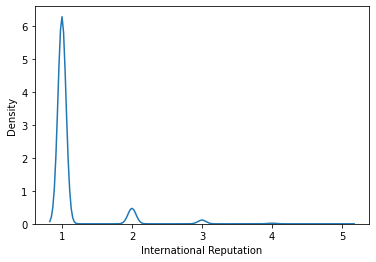

In [32]:
# International Reputation has 36 null-values
print('The kurtosis is ',dfc['International Reputation'].kurt())
print('The skewness is ',dfc['International Reputation'].skew())
sns.kdeplot(data=dfc,x='International Reputation')
plt.show()
dfc['International Reputation']=dfc['International Reputation'].fillna(dfc['International Reputation'].median())

**As it is right skewed and leptokurtic in nature.we fill by median.**


In [33]:
# Contract Valid Until has 221 null-values
# since it is categorial column we fill null-values by its mode
dfc['Contract Valid Until']=dfc['Contract Valid Until'].fillna(dfc['Contract Valid Until'].mode()[0])

In [41]:
# club column
dfc['Club']=dfc['Club'].fillna('No Club')

Since the club column is categorical and number of missing value is less so we can replace it with no club.

In [34]:
# Position  has 47 null-values
# since it is datetime column we fill null-values by its mode
dfc['Position']=dfc['Position'].fillna(dfc['Position'].mode()[0])

The kurtosis is  0.11515899639529037
The skewness is  0.22796509933586184


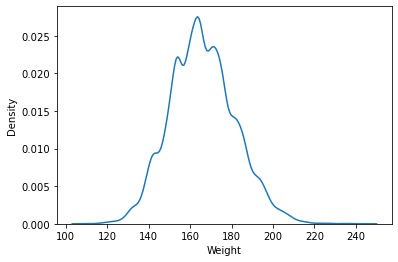

In [35]:
# Weight  has 36 null-values
# hence it is numerical column 
print('The kurtosis is ',dfc['Weight'].kurt())
print('The skewness is ',dfc['Weight'].skew())
sns.kdeplot(data=dfc,x='Weight')
plt.show()
dfc['Weight']=dfc['Weight'].fillna(dfc['Weight'].mean())

**since its is symmentric and mesokurtic in nature we fill null-values by mean**

The kurtosis is  -1.0457300021985145
The skewness is  -0.5471250559828255


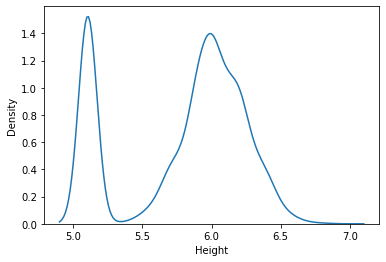

In [36]:
# Height  has 36 null-values
# Hence it is numerical column 
print('The kurtosis is ',dfc['Height'].kurt())
print('The skewness is ',dfc['Height'].skew())
sns.kdeplot(data=dfc,x='Height')
plt.show()
dfc['Height']=dfc['Height'].fillna(dfc['Height'].mean())

**since its is symmentric and mesokurtic in nature we fill null-values by mean**

In [37]:
# These records have more null-values in many columns so dropped these records
dfc=dfc.dropna(thresh=18)
dfc

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,240331,P. Camará,21,Guinea Bissau,58,69,Crawley Town,220.0,1.0,Right,...,46.0,14.0,18.0,15.0,7.0,9.0,9.0,6.0,15.0,429.0
1,183465,J. Rodwell,27,England,68,68,Blackburn Rovers,925.0,16.0,Right,...,69.0,66.0,69.0,64.0,9.0,10.0,15.0,11.0,12.0,1.8
2,205186,P. Gazzaniga,26,Argentina,74,78,Tottenham Hotspur,5.0,46.0,Right,...,55.0,23.0,20.0,11.0,76.0,73.0,84.0,72.0,76.0,9.6
3,233531,Y. Soteldo,21,Venezuela,71,81,Universidad de Chile,3.8,6.0,Right,...,65.0,25.0,23.0,20.0,13.0,7.0,9.0,13.0,6.0,6.1
4,243718,R. Koot,18,Netherlands,56,68,Fortuna Sittard,120.0,1.0,Right,...,39.0,11.0,14.0,12.0,59.0,55.0,59.0,55.0,56.0,198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25461,242116,M. Etuin,22,France,62,69,FC Lorient,425.0,2.0,Left,...,61.0,53.0,59.0,58.0,8.0,7.0,11.0,6.0,13.0,829.0
25470,237387,D. Dalling,19,England,54,71,Queens Park Rangers,150.0,1.0,Right,...,57.0,35.0,30.0,42.0,10.0,14.0,9.0,9.0,7.0,379.0
25477,223132,K. Keleş,30,Turkey,68,68,Akhisar Belediyespor,650.0,7.0,Left,...,58.0,65.0,66.0,65.0,9.0,8.0,16.0,12.0,8.0,1.3
25482,237745,H. Miyazawa,29,Japan,63,63,Hokkaido Consadole Sapporo,350.0,1.0,Right,...,64.0,39.0,43.0,40.0,7.0,15.0,7.0,13.0,8.0,438.0


The kurtosis is  -0.2662801010854272
The skewness is  1.052515539895383


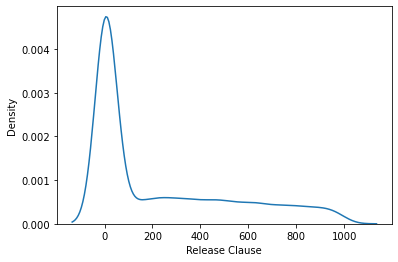

In [38]:
# Release Clause   has 36 null-values
# Hence it is numerical column 
print('The kurtosis is ',dfc['Release Clause'].kurt())
print('The skewness is ',dfc['Release Clause'].skew())
sns.kdeplot(data=dfc,x='Release Clause')
plt.show()
dfc['Release Clause']=dfc['Release Clause'].fillna(dfc['Release Clause'].median())

**The data is right skewed and mesokurtic we fill null-values by median**

In [42]:
dfc.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions 

## 7. find out If there is any player above 2.0*IQR – Q1 and below 2.0*IQR + Q3. What would happen if the data has above or below the mentioned values and display the names of the players?

In [43]:
Q1=dfc['Age'].quantile(0.25)
Q2=dfc['Age'].quantile(0.50)
Q3=dfc['Age'].quantile(0.75)
IQR=Q3-Q1
LL=(2.0*IQR)-Q1
UL=(2.0*IQR)+Q3
dfc[(dfc['Age']>=LL)&(dfc['Age']<=UL)]['Name']

0           P. Camará
1          J. Rodwell
2        P. Gazzaniga
3          Y. Soteldo
4             R. Koot
             ...     
25461        M. Etuin
25470      D. Dalling
25477        K. Keleş
25482     H. Miyazawa
25489          T. Lam
Name: Name, Length: 13619, dtype: object

In [44]:
# outliers
dfc[(dfc['Age']<LL)|(dfc['Age']>UL)]['Name']

2748         O. Pérez
6326    K. Pilkington
Name: Name, dtype: object

In [46]:
# Q1=dfc.quantile(0.25)
# Q2=dfc.quantile(0.50)
# Q3=dfc.quantile(0.75)
# IQR=Q3-Q1
# LL=(2.0*IQR)-Q1
# UL=(2.0*IQR)+Q3
# dfc[(dfc>=LL)&(dfc<=UL)]['Name']

## 8. Check the Categorical variables and Find if there is any data imbalance in any column also find if any cardinality problem exists.

In [48]:
categorical=dfc.select_dtypes(include='object')
categorical.columns

Index(['Name', 'Nationality', 'Club', 'Preferred Foot', 'Work Rate',
       'Body Type', 'Position'],
      dtype='object')

In [58]:
# cardinality
categorical.nunique()                                 

Name              13019
Photo             13621
Nationality         160
Club Logo           678
Preferred Foot        2
Work Rate             9
Body Type             9
Position             27
dtype: int64

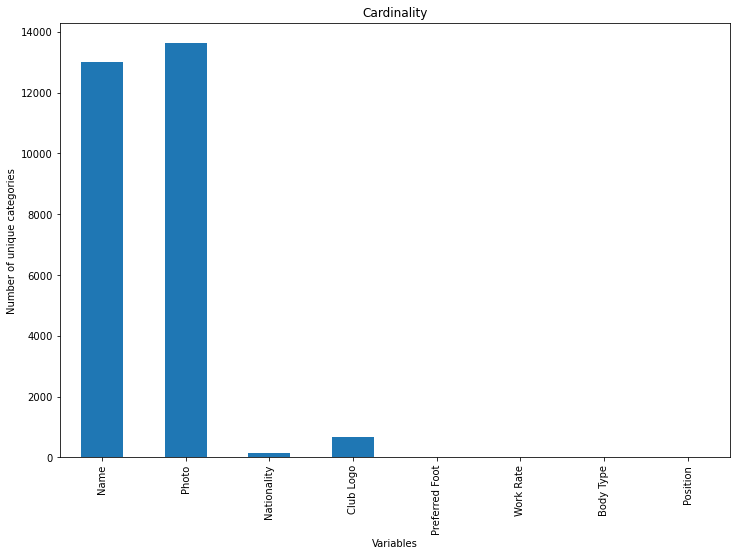

In [59]:
categorical.nunique().plot.bar(figsize=(12,8))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')
plt.show()

## 9. Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

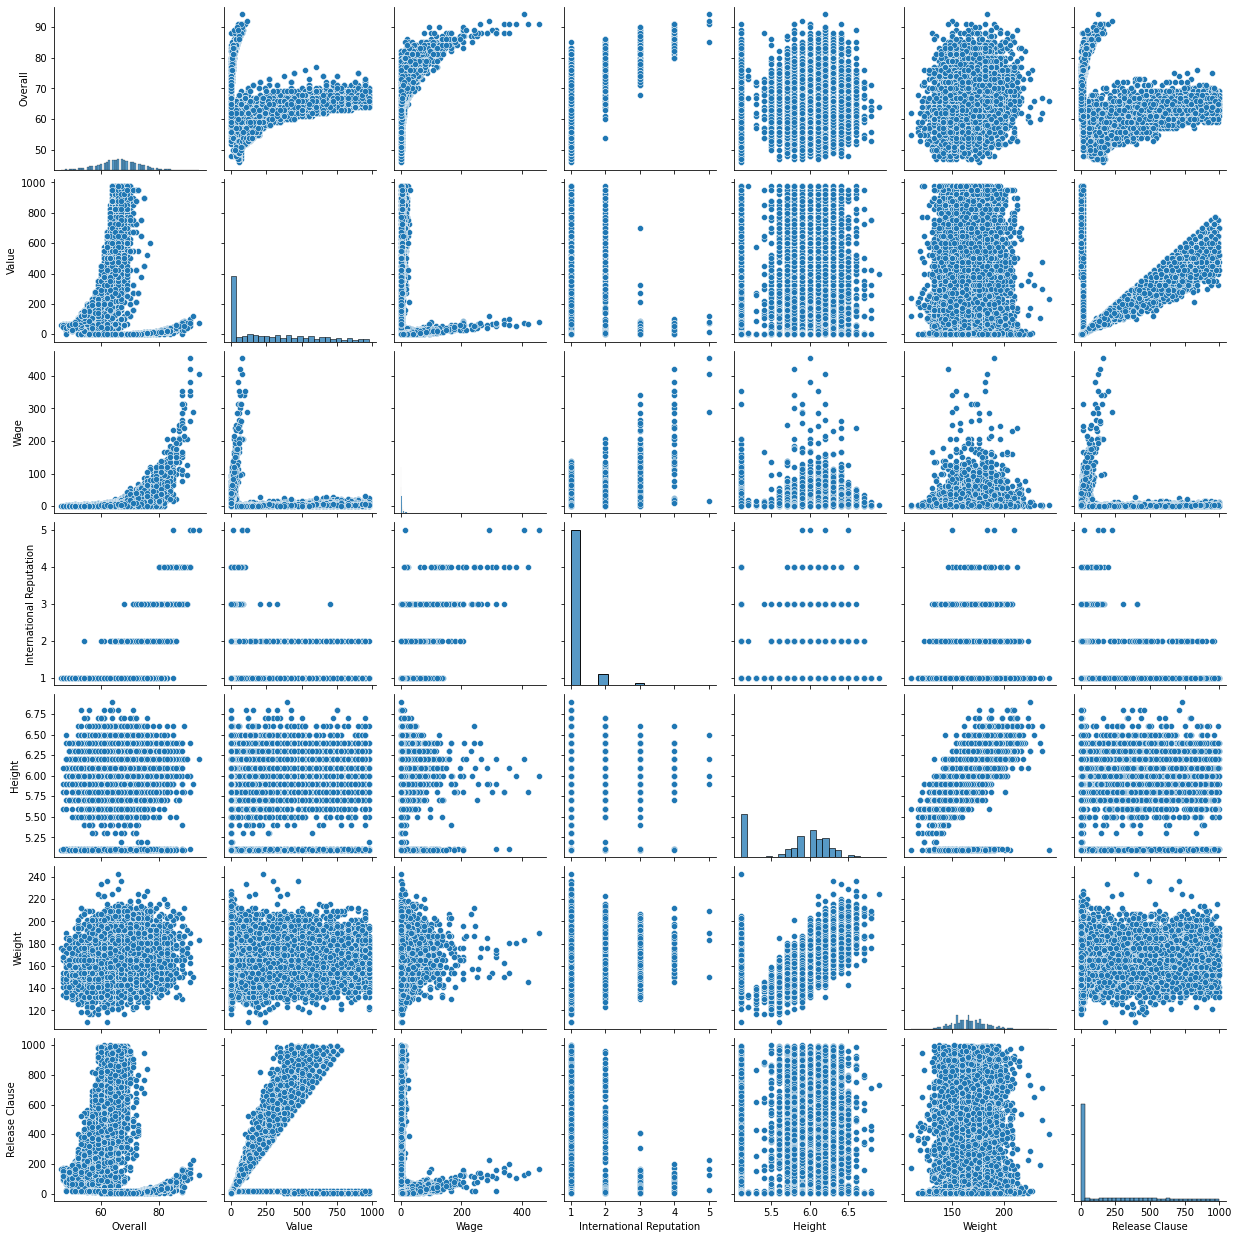

In [60]:
sns.pairplot(data=dfc,vars=['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause'])
plt.show()

## 10. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.


In [54]:
dfc['year'] = dfc['Contract Valid Until'].dt.year
dfc['contract_rank']=dfc['Overall'].rank(method='dense',ascending=False)
top_20=dfc[(dfc['contract_rank']<=20)&(dfc['year']==2020)].sort_values(by='contract_rank')
top_20

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,year,contract_rank
15989,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51.0,380.0,Right,...,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104.6,2020,3.0
6869,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67.0,420.0,Right,...,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137.4,2020,3.0
963,183277,E. Hazard,27,Belgium,91,91,Chelsea,93.0,340.0,Right,...,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1,2020,3.0
20448,193080,De Gea,27,Spain,91,93,Manchester United,72.0,260.0,Right,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6,2020,3.0
20440,138956,G. Chiellini,33,Italy,89,89,Juventus,27.0,215.0,Left,...,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44.6,2020,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7690,186130,J. Chester,29,Wales,74,74,Aston Villa,4.4,18.0,Right,...,73.0,76.0,11.0,12.0,12.0,14.0,13.0,8.3,2020,20.0
7268,220620,F. Hadergjonaj,23,Switzerland,74,80,Huddersfield Town,6.5,30.0,Right,...,73.0,72.0,15.0,6.0,12.0,8.0,11.0,13.7,2020,20.0
7259,221931,P. Žulj,25,Austria,74,78,SK Sturm Graz,7.0,18.0,Left,...,67.0,63.0,10.0,16.0,8.0,8.0,15.0,10.7,2020,20.0
11200,210972,Manquillo,24,Spain,74,78,Newcastle United,6.0,30.0,Right,...,75.0,74.0,14.0,7.0,14.0,12.0,13.0,11.9,2020,20.0


## 10.1. What would the average wage for this set of players be?

In [55]:
# average wage
top_20['Wage'].mean()

38.91706161137441

## 10.2. What is the average age?

In [56]:
# average age
top_20['Age'].mean()

28.61611374407583

## 10.3. Is there a correlation between the Overall rating and Value for these players? If Yes  what kind of relationship that the features have, also explain why this kind of relationship  could happen.

<AxesSubplot:>

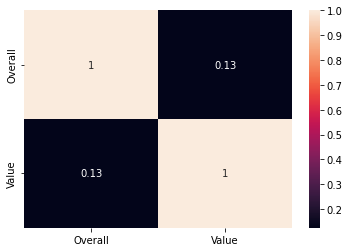

In [58]:
sns.heatmap(top_20[['Overall','Value']].corr(),annot=True)

## 11. Generate tables containing the top 5 players by Overall rating for each unique position.


In [59]:
a=dfc[['Name','Overall','Position','Wage']]
a['rank']=a.groupby('Position')['Overall'].rank(method='dense')
b=a[a['rank']<=5].sort_values(by=['Position','rank'])
b

,Name,Overall,Position,Wage,rank
2959,Y. Uchimura,48,CAM,1.0,1.0
14762,Nicolas Firmino,48,CAM,1.0,1.0
5683,Yin Congyao,49,CAM,1.0,2.0
10058,J. Garcia Sossa,49,CAM,1.0,2.0
21350,B. Buckley,49,CAM,1.0,2.0
...,...,...,...,...,...
18560,H. Andersson,51,ST,1.0,5.0
21822,S. Twine,51,ST,1.0,5.0
23100,M. Bloomfield,51,ST,3.0,5.0
23439,A. Ammitzbøll,51,ST,1.0,5.0


## 11.1. Are there any players appearing at more than one table? Please point out such players.

In [60]:
b[b.duplicated()]     

,Name,Overall,Position,Wage,rank


## 11.2. What is the average wage one can expect to pay for the top 5 in every position?

In [61]:
b.groupby('Position')['Wage'].mean()

Position
CAM    1.100000
CB     1.205882
CDM    1.100000
CF     1.375000
CM     1.097561
GK     1.041667
LAM    7.700000
LB     1.250000
LCB    1.000000
LCM    1.222222
LDM    1.250000
LF     4.666667
LM     1.142857
LS     1.714286
LW     1.000000
LWB    1.400000
RAM    8.181818
RB     1.272727
RCB    1.000000
RCM    1.111111
RDM    1.083333
RF     7.428571
RM     1.600000
RS     1.800000
RW     1.181818
RWB    1.090909
ST     1.193548
Name: Wage, dtype: float64

# Statistical Analysis:

## 1. Test statistically whether the Left-hand player’s overall rating is higher than the Right-hand overall score. Alpha = 0.05
Before checking the test, Kindly make sure data is normally distributed.

In [64]:
# testing hypothesis
# ho:mul-mur<=0
# ha:mul-mur>0
    
# decision criteria
alpha=0.05
print('The alpha is ',alpha)
    
# Data Seperation
dfr=dfc[dfc['Preferred Foot']=='Right']['Overall']
dfl=dfc[dfc['Preferred Foot']=='Left']['Overall']

# normalitity test
statsl,p_valuel=stats.shapiro(dfl)
statsr,p_valuer=stats.shapiro(dfr)
print('The shapiro test of right handed is ',round(p_valuer,5))
print('The shapiro test of left handed is ',round(p_valuel,5))


The alpha is  0.05
The shapiro test of right handed is  0.0
The shapiro test of left handed is  0.0


## 2. Does the age factor affect the player’s potential? Check the claim that the players who are greater than 35, their potential will be lesser than those whose age is less than 35. Alpha = 0.05

In [65]:
# testing hypothesis
# ho: mug-mul>=0
# ha: mug-mul<0

#decision criteria
alpha =0.05
z_alpha=stats.norm.ppf(alpha)
print('The z_alpha is ',round(z_alpha,4))

# Data Separation 
greater_35=dfc[dfc['Age']>35]['Potential']
lesser_35=dfc[dfc['Age']<35]['Potential']

# sample statistic
x1=np.mean(greater_35)
x2=np.mean(lesser_35)
s1=np.std(greater_35,ddof=1)
s2=np.std(lesser_35,ddof=1)
n1=len(greater_35)
n2=len(lesser_35)
z=(x1-x2)/(np.sqrt(((s1**2)/n1)+((s2**2)/n2)))
print('The z is ',round(z,4))

# pvalue
p_value=stats.norm.cdf(z)
print('The p_value is ',p_value)
print('The alpha is ',alpha)


The z_alpha is  -1.6449
The z is  -7.3431
The p_value is  1.043420705523228e-13
The alpha is  0.05


## 3. Use the statistical test to check the relationship between the Preferred Foot and Position with the 99% confident interval.

In [66]:
# testing hypothesis
# ho: The Preferred Foot and Position are independent
# ha: The Preferred Foot and Position are not independent

# observed values
observed=pd.crosstab(dfc['Preferred Foot'],dfc['Position'])
observed

Position,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Preferred Foot,,,,,,,,,,,,,,,,,,,,,
Left,202,253,99,11,195,159,7,863,198,75,...,10,26,30,19,3,189,29,74,2,210
Right,540,1074,622,43,874,1372,7,115,286,216,...,963,452,269,164,9,650,137,200,63,1376


In [67]:
# decision criteria
c=0.99
alpha=1-c
chisq_critical=stats.chi2.isf(alpha,df=(2-1)*(27-1))
print('The chisq_critical is ',round(chisq_critical,4))

# sample statistics
test_stats,p_value,dof,exp=stats.chi2_contingency(observed,correction=False)
print('The chisquare stats is ',round(test_stats,4))
print('The p_value is ',p_value)
print('The alpha is ',round(alpha,4))

The chisq_critical is  45.6417
The chisquare stats is  3380.8357
The p_value is  0.0
The alpha is  0.01


## 4. Does the International Reputation cause a significant effect on players' Wages? Check the claim with a 0.04 significance level. C
check the Normality of data before the actual test.

In [69]:
# hypothesis testing
# h0: The wages are equal for all the International Reputation scale.
# ha: atleast one wages is equal for the International Reputation scale.

# decision criteria
alpha =0.04

# Data Separation 
dfc1=dfc[dfc['International Reputation']==1.0]['Wage']
dfc2=dfc[dfc['International Reputation']==2.0]['Wage']
dfc3=dfc[dfc['International Reputation']==3.0]['Wage']
dfc4=dfc[dfc['International Reputation']==4.0]['Wage']
dfc5=dfc[dfc['International Reputation']==5.0]['Wage']

# normalitity test
stats1,p_value1=stats.shapiro(dfc1)
stats2,p_value2=stats.shapiro(dfc2)
stats3,p_value3=stats.shapiro(dfc3)
stats4,p_value4=stats.shapiro(dfc4)
stats5,p_value5=stats.shapiro(dfc5)

print('The shapiro test of International Reputation(1) is ',round(p_value1,5))
print('The shapiro test of International Reputation(2) is ',round(p_value2,5))
print('The shapiro test of International Reputation(3) is ',round(p_value3,5))
print('The shapiro test of International Reputation(4) is ',round(p_value4,5))
print('The shapiro test of International Reputation(5) is ',round(p_value5,5))
print('The alpha is ',alpha)

The shapiro test of International Reputation(1) is  0.0
The shapiro test of International Reputation(2) is  0.0
The shapiro test of International Reputation(3) is  0.0
The shapiro test of International Reputation(4) is  0.2113
The shapiro test of International Reputation(5) is  0.38618
The alpha is  0.04


## 5. Check the claim that the median wages of under top 20 players are lesser than or equal to 25000. Test the claim with a 0.05 % significance level. Check the data is normally distributed or not before the testing the claim statistically

In [75]:
a=dfc[['Name','Wage']]                   # doubt
a['wage_rank']=a['Wage'].rank(method='dense',ascending=False)
b=a[a['wage_rank']<=20]
b

,Name,Wage,wage_rank
394,Sergio Busquets,315.0,7.0
963,E. Hazard,340.0,6.0
1899,Cristiano Ronaldo,405.0,3.0
2644,S. Agüero,300.0,8.0
2869,R. Lukaku,230.0,18.0
2894,Coutinho,340.0,6.0
3292,Casemiro,285.0,10.0
4717,Piqué,240.0,16.0
5099,L. Suárez,455.0,1.0
5226,J. Rodríguez,315.0,7.0


In [76]:
# testing hypothesis
h0:me<=25000
ha:me>25000
    
# decision criteria
alpha=0.05

# normality
print('The alpha is ',alpha)
print('The shapiro of wages for top 20 is\n',stats.shapiro(b['Wage']))



The alpha is  0.05
The shapiro of wages for top 20 is
 ShapiroResult(statistic=0.9411141872406006, pvalue=0.14279809594154358)


In [77]:
# decision criteria
alpha=0.05
n=len(b)
t_alpha=stats.t.isf(alpha,df=n-1)
print('t_alpha is ',round(t_alpha,4))

# sample statistics
x_bar=np.mean(b['Wage'])
std=np.std(b['Wage'],ddof=1)
t=((x_bar-25000)/(std/np.sqrt(n)))
print('t is ',round(t,4))

# p_value
p_value=stats.t.sf(t,df=n-1)
print('The p_value is ',round(p_value,4))
print('The alpha is ',alpha)


t_alpha is  1.7081
t is  -1913.1066
The p_value is  1.0
The alpha is  0.05
